In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix, RocCurveDisplay, precision_recall_curve, brier_score_loss
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

## Load data

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

X_train = df_train.drop(columns="is_fraud")
y_train = df_train["is_fraud"]
X_test = df_test.drop(columns="is_fraud")
y_test = df_test["is_fraud"]

# Model Development

## Logistic Regression

In [3]:
param_grid = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],  # supports both l1 and l2
}

grid = GridSearchCV(LogisticRegression(), param_grid, scoring="f1", cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

lr_model = grid.best_estimator_

In [4]:
y_lr_pred = lr_model.predict(X_test)
y_lr_proba = lr_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid.best_params_)
print("\nClassification Report - Logistic Regression")
print(classification_report(y_test, y_lr_pred))

auc = roc_auc_score(y_test, y_lr_proba)
print(f"AUC-ROC Score: {auc:.4f}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     16109
           1       0.37      0.74      0.49      2656

    accuracy                           0.78     18765
   macro avg       0.66      0.77      0.68     18765
weighted avg       0.87      0.78      0.81     18765

AUC-ROC Score: 0.8325


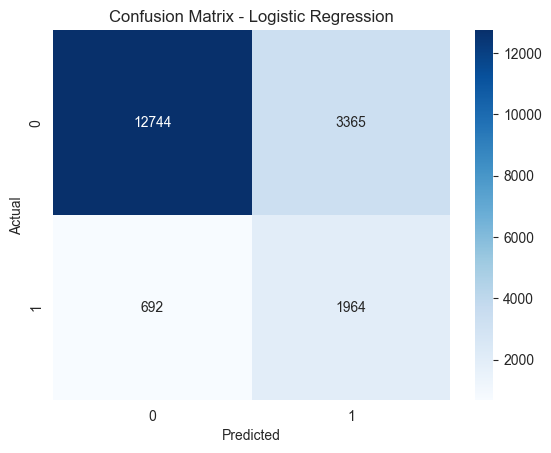

In [5]:
conf_matrix = confusion_matrix(y_test, y_lr_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

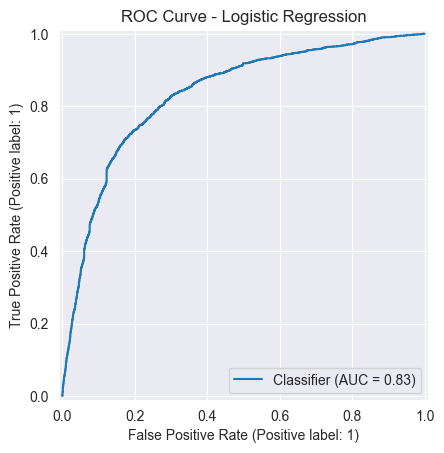

In [6]:
RocCurveDisplay.from_predictions(y_test, y_lr_proba)
plt.title("ROC Curve - Logistic Regression")
plt.show()

## Random Forest

In [7]:
param_grid = {
    "n_estimators": [100, 150, 200],          # Number of trees
    "max_depth": [None, 10],         # Depth of trees
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring="f1", cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

rf_model = grid.best_estimator_

In [8]:
y_rf_pred = rf_model.predict(X_test)
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_rf_proba)

print("Best Parameters:", grid.best_params_)
print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_rf_pred))
print(f"AUC-ROC: {auc:.4f}")

Best Parameters: {'max_depth': None, 'n_estimators': 150}

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     16109
           1       0.77      0.82      0.80      2656

    accuracy                           0.94     18765
   macro avg       0.87      0.89      0.88     18765
weighted avg       0.94      0.94      0.94     18765

AUC-ROC: 0.9614


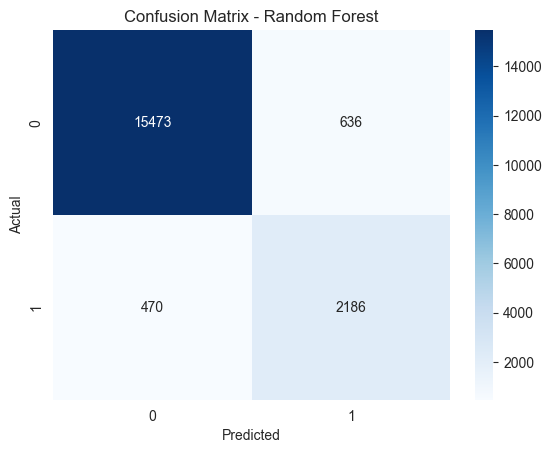

In [9]:
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

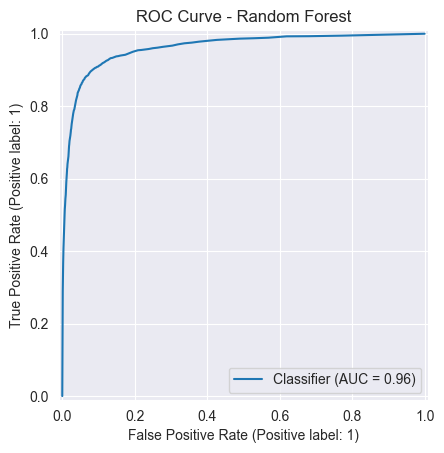

In [10]:
RocCurveDisplay.from_predictions(y_test, y_rf_proba)
plt.title("ROC Curve - Random Forest")
plt.show()

## XGBoost

In [11]:
param_grid = {
    "max_depth": [5, 7, 9, 11],
}

grid = GridSearchCV(
    XGBClassifier(eval_metric="logloss", random_state=42),
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

xgb_model = grid.best_estimator_

In [12]:
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_xgb_proba)

print("Best Parameters:", grid.best_params_)
print("\nClassification Report - XGBoost")
print(classification_report(y_test, y_xgb_pred))
print(f"AUC-ROC: {auc:.4f}")

Best Parameters: {'max_depth': 11}

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     16109
           1       0.73      0.82      0.78      2656

    accuracy                           0.93     18765
   macro avg       0.85      0.89      0.87     18765
weighted avg       0.94      0.93      0.93     18765

AUC-ROC: 0.9603


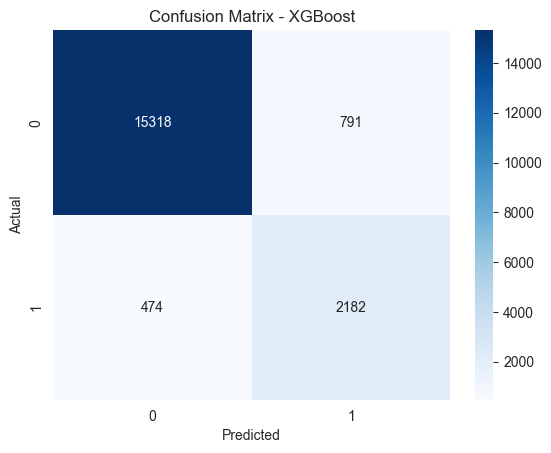

In [13]:
sns.heatmap(confusion_matrix(y_test, y_xgb_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

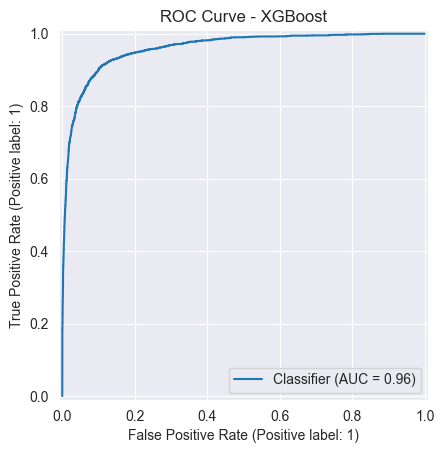

In [14]:
RocCurveDisplay.from_predictions(y_test, y_xgb_proba)
plt.title("ROC Curve - XGBoost")
plt.show()

## MLP

In [15]:
param_grid = {
    "hidden_layer_sizes": [(100,), (50, 50)],
    "alpha": [0.0001, 0.001],            # L2 regularization term
    "learning_rate": ["constant", "adaptive"],
}

grid = GridSearchCV(
    MLPClassifier(max_iter=300, random_state=42),
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

mlp_model = grid.best_estimator_

C:\Users\Markiyan Kruhliy\DataspellProjects\test_v1\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
y_mlp_pred = mlp_model.predict(X_test)
y_mlp_proba = mlp_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_mlp_proba)

print("Best Parameters:", grid.best_params_)
print("\nClassification Report - MLP Classifier")
print(classification_report(y_test, y_mlp_pred))
print(f"AUC-ROC: {auc:.4f}")

Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}

Classification Report - MLP Classifier
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     16109
           1       0.59      0.79      0.67      2656

    accuracy                           0.89     18765
   macro avg       0.78      0.85      0.80     18765
weighted avg       0.91      0.89      0.90     18765

AUC-ROC: 0.9230


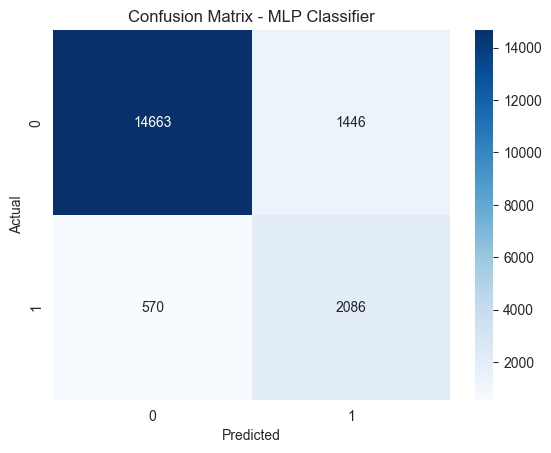

In [17]:
sns.heatmap(confusion_matrix(y_test, y_mlp_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

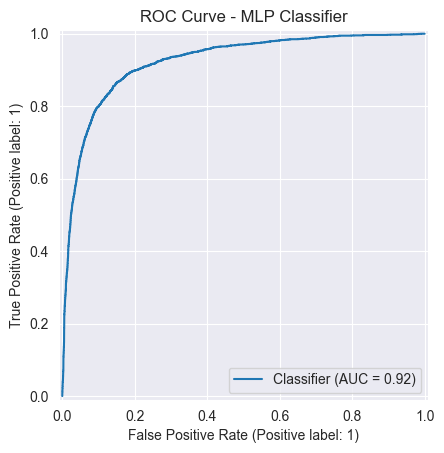

In [18]:
RocCurveDisplay.from_predictions(y_test, y_mlp_proba)
plt.title("ROC Curve - MLP Classifier")
plt.show()

## LinearSVC

In [23]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    LinearSVC(max_iter=5000, random_state=42),
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

svc_model = grid.best_estimator_

In [25]:
y_svc_pred = svc_model.predict(X_test)
# y_svc_proba = svc_model.predict_proba(X_test)[:, 1]            # calibrate first to predict probabilities
#auc = roc_auc_score(y_test, y_svc_proba)

print("Best Parameters (pre-calibration):", grid.best_params_)
print("\nClassification Report - Linear SVC")
print(classification_report(y_test, y_svc_pred))
print(f"AUC-ROC: N/A")

Best Parameters (pre-calibration): {'C': 0.1}

Classification Report - Linear SVC
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     16109
           1       0.37      0.74      0.49      2656

    accuracy                           0.79     18765
   macro avg       0.66      0.77      0.68     18765
weighted avg       0.87      0.79      0.81     18765

AUC-ROC: N/A


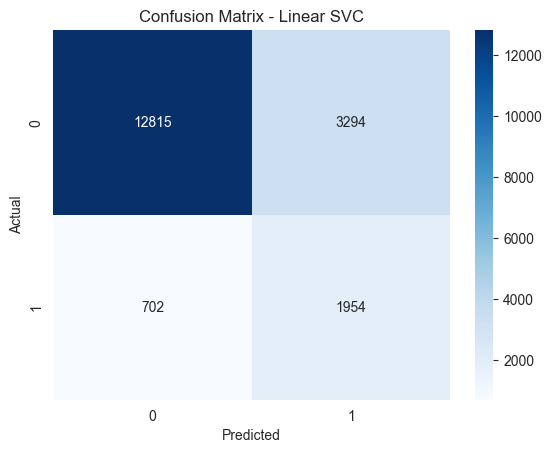

In [26]:
sns.heatmap(confusion_matrix(y_test, y_svc_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## KNN

In [27]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

knn_model = grid.best_estimator_

In [28]:
y_knn_pred = knn_model.predict(X_test)
y_knn_proba = knn_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_knn_proba)

print("Best Parameters:", grid.best_params_)
print("\nClassification Report - KNN")
print(classification_report(y_test, y_knn_pred))
print(f"AUC-ROC: {auc:.4f}")

C:\Users\Markiyan Kruhliy\DataspellProjects\test_v1\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Markiyan Kruhliy\DataspellProjects\test_v1\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Markiyan Kruhliy\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Markiyan Kruhliy\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable,

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}

Classification Report - KNN
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     16109
           1       0.68      0.84      0.75      2656

    accuracy                           0.92     18765
   macro avg       0.83      0.89      0.85     18765
weighted avg       0.93      0.92      0.93     18765

AUC-ROC: 0.9217


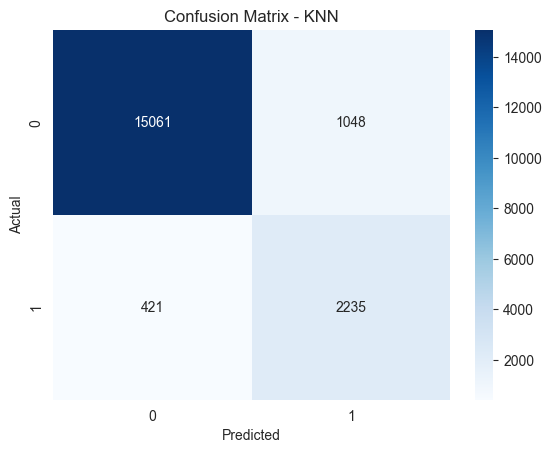

In [29]:
sns.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

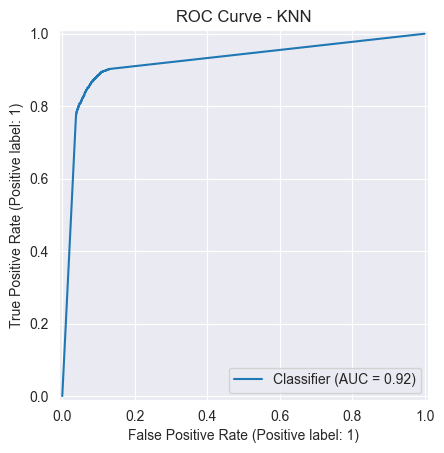

In [30]:
RocCurveDisplay.from_predictions(y_test, y_knn_proba)
plt.title("ROC Curve - KNN")
plt.show()

# Probability Calibration

In [31]:
lr_calibrated = CalibratedClassifierCV(lr_model, cv=3, method='isotonic')
lr_calibrated.fit(X_train, y_train)

y_lr_pred_cal = lr_calibrated.predict(X_test)
y_lr_proba_cal = lr_calibrated.predict_proba(X_test)[:, 1]

In [32]:
rf_calibrated = CalibratedClassifierCV(rf_model, cv=3, method='isotonic')
rf_calibrated.fit(X_train, y_train)

y_rf_pred_cal = rf_calibrated.predict(X_test)
y_rf_proba_cal = rf_calibrated.predict_proba(X_test)[:, 1]

In [33]:
xgb_calibrated = CalibratedClassifierCV(xgb_model, cv=3, method='isotonic')
xgb_calibrated.fit(X_train, y_train)

y_xgb_pred_cal = xgb_calibrated.predict(X_test)
y_xgb_proba_cal = xgb_calibrated.predict_proba(X_test)[:, 1]

In [34]:
mlp_calibrated = CalibratedClassifierCV(mlp_model, cv=3, method='isotonic')
mlp_calibrated.fit(X_train, y_train)

y_mlp_pred_cal = mlp_calibrated.predict(X_test)
y_mlp_proba_cal = mlp_calibrated.predict_proba(X_test)[:, 1]

In [35]:
svc_calibrated = CalibratedClassifierCV(svc_model, cv=3, method='isotonic')
svc_calibrated.fit(X_train, y_train)

y_svc_pred_cal = svc_calibrated.predict(X_test)
y_svc_proba_cal = svc_calibrated.predict_proba(X_test)[:, 1]

In [36]:
knn_calibrated = CalibratedClassifierCV(knn_model, cv=3, method='isotonic')
knn_calibrated.fit(X_train, y_train)

y_knn_pred_cal = knn_calibrated.predict(X_test)
y_knn_proba_cal = knn_calibrated.predict_proba(X_test)[:, 1]

In [37]:
# Dictionary of model predictions and probabilities
model_outputs = {
    "Logistic Regression": {"y_pred": y_lr_pred, "y_proba": y_lr_proba,
                            "y_pred_cal": y_lr_pred_cal, "y_proba_cal": y_lr_proba_cal},
    "Random Forest": {"y_pred": y_rf_pred, "y_proba": y_rf_proba,
                      "y_pred_cal": y_rf_pred_cal, "y_proba_cal": y_rf_proba_cal},
    "XGBoost": {"y_pred": y_xgb_pred, "y_proba": y_xgb_proba,
                "y_pred_cal": y_xgb_pred_cal, "y_proba_cal": y_xgb_proba_cal},
    "MLP": {"y_pred": y_mlp_pred, "y_proba": y_mlp_proba,
            "y_pred_cal": y_mlp_pred_cal, "y_proba_cal": y_mlp_proba_cal},
    "Linear SVC": {"y_pred": y_svc_pred, #"y_proba": y_svc_proba,
                   "y_pred_cal": y_svc_pred_cal, "y_proba_cal": y_svc_proba_cal},
    "KNN": {"y_pred": y_knn_pred, "y_proba": y_knn_proba,
            "y_pred_cal": y_knn_pred_cal, "y_proba_cal": y_knn_proba_cal},
}

## Evaluate Calibration

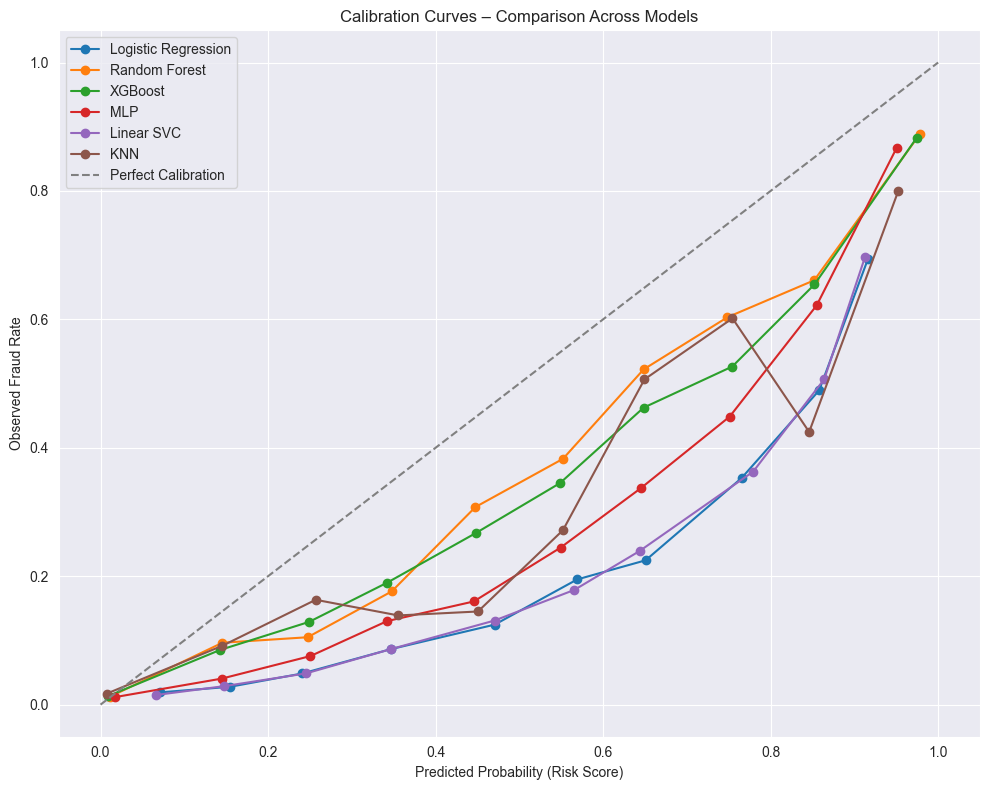

In [38]:
plt.figure(figsize=(10, 8))

for name, outputs in model_outputs.items():
    prob_true, prob_pred = calibration_curve(y_test, outputs['y_proba_cal'], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.title('Calibration Curves – Comparison Across Models')
plt.xlabel('Predicted Probability (Risk Score)')
plt.ylabel('Observed Fraud Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
def compute_ece(y_true, y_prob, n_bins=10):
    bin_boundaries = np.linspace(0.0, 1.0, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    ece = 0.0
    for lower, upper in zip(bin_lowers, bin_uppers):
        mask = (y_prob > lower) & (y_prob <= upper)
        if np.any(mask):
            bin_accuracy = y_true[mask].mean()
            bin_confidence = y_prob[mask].mean()
            ece += np.abs(bin_confidence - bin_accuracy) * mask.mean()
    return ece


results = []

for name, outputs in model_outputs.items():

    if name=="Linear SVC":
        brier_raw = "NA"
        ece_raw = "NA"

    else:
        brier_raw = round(brier_score_loss(y_test, outputs['y_proba']), 4)
        ece_raw = round(compute_ece(np.array(y_test), np.array(outputs['y_proba'])), 4)

    brier_cal = round(brier_score_loss(y_test, outputs['y_proba_cal']), 4)
    ece_cal = round(compute_ece(np.array(y_test), np.array(outputs['y_proba_cal'])), 4)

    # Save results
    results.append({
        'Model': name,
        'Brier Score (Raw)': brier_raw,
        'Brier Score (Calibrated)': brier_cal,
        'ECE (Raw)': ece_raw,
        'ECE (Calibrated)': ece_cal,
    })

results_df = pd.DataFrame(results)
display(results_df)

,Model,Brier Score (Raw),Brier Score (Calibrated),ECE (Raw),ECE (Calibrated)
0,Logistic Regression,0.1631,0.1618,0.2377,0.2310
1,Random Forest,0.0495,0.0479,0.0546,0.0297
2,XGBoost,0.0522,0.0498,0.0352,0.0353
3,MLP,0.0837,0.0744,0.0725,0.0768
4,Linear SVC,NA,0.1615,NA,0.2314
5,KNN,0.065,0.0590,0.0499,0.0482


# Model Evaluation

In [40]:
results = []

for model_name, preds in model_outputs.items():
    f1 = f1_score(y_test, preds["y_pred_cal"])        # Evaluating on calibrated model
    auc = roc_auc_score(y_test, preds["y_proba_cal"])
    precision = precision_score(y_test, preds["y_pred_cal"])
    recall = recall_score(y_test, preds["y_pred_cal"])

    results.append({
        "Model": model_name,
        "F1": round(f1, 4),
        "AUC": round(auc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4)
    })

df_results = pd.DataFrame(results).sort_values("F1", ascending=False)
display(df_results)

,Model,F1,AUC,Precision,Recall
1,Random Forest,0.7934,0.9627,0.7612,0.8283
2,XGBoost,0.7855,0.9625,0.7427,0.8336
5,KNN,0.7614,0.9347,0.6985,0.8366
3,MLP,0.6942,0.9406,0.5936,0.8358
0,Logistic Regression,0.5032,0.8343,0.3830,0.7331
4,Linear SVC,0.4987,0.8344,0.3794,0.7274


C:\Users\Markiyan Kruhliy\AppData\Local\Temp\ipykernel_14556\423890056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="F1", palette="viridis")


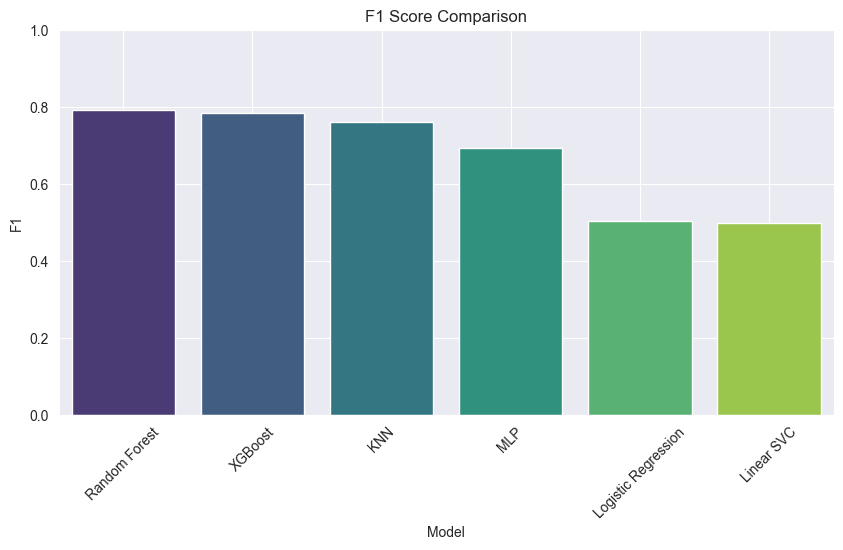

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x="Model", y="F1", palette="viridis")
plt.title("F1 Score Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

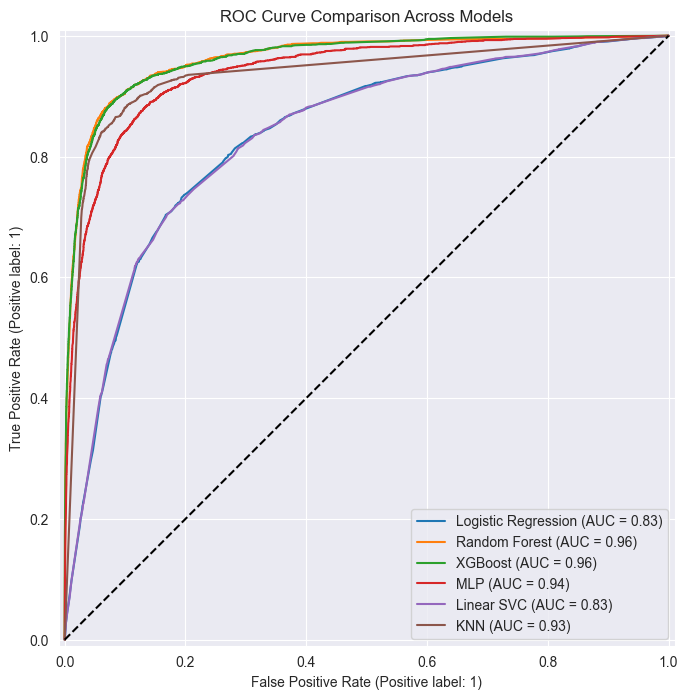

In [42]:
plt.figure(figsize=(8, 8))
for name, outputs in model_outputs.items():
    RocCurveDisplay.from_predictions(y_test, outputs["y_proba_cal"], name=name, ax=plt.gca())

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve Comparison Across Models")
plt.grid(True)
plt.show()

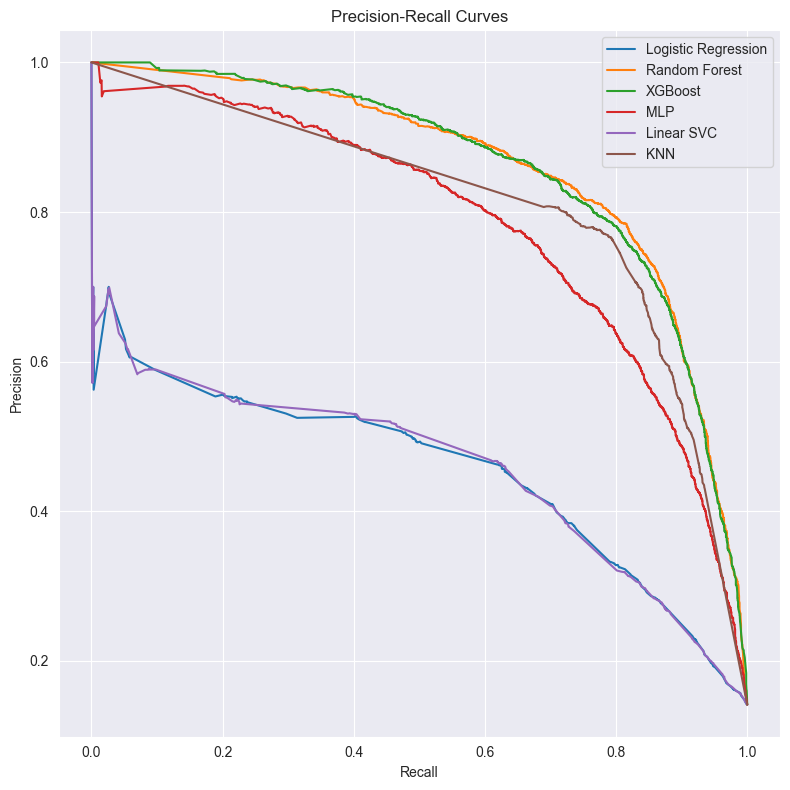

In [43]:
plt.figure(figsize=(8, 8))
for name, outputs in model_outputs.items():
    precision, recall, _ = precision_recall_curve(y_test, outputs["y_proba_cal"])
    plt.plot(recall, precision, label=name)

plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Markiyan Kruhliy\AppData\Local\Temp\ipykernel_14556\2384157495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="AUC", palette="crest")


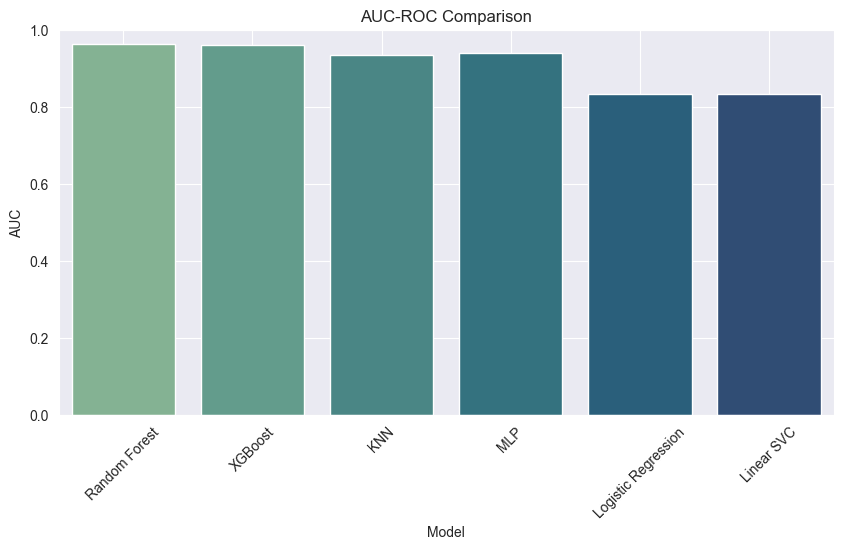

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x="Model", y="AUC", palette="crest")
plt.title("AUC-ROC Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Risk Scoring and Segmentation

In [66]:
# Assume you have calibrated probabilities from your model

# define risk band assignment
def assign_risk_band(probability):
    if probability >= 0.7:
        return 'High'
    elif probability >= 0.2:
        return 'Medium'
    else:
        return 'Low'

risk_bands = np.array([assign_risk_band(prob) for prob in y_rf_proba_cal])

risk_df = pd.DataFrame({
    'risk_band': risk_bands,
    'true_label': y_test.values,
    'predicted_prob': y_rf_proba_cal
})

# summarize outcomes
risk_summary = risk_df.groupby('risk_band').agg(
    total_transactions=('true_label', 'count'),
    detected_frauds=('true_label', 'sum')
)
risk_summary['fraud_rate'] = risk_summary['detected_frauds'] / risk_summary['total_transactions']
risk_summary['fraud_capture_rate'] = (risk_summary['detected_frauds'] / risk_summary['detected_frauds'].sum()) * 100

risk_summary = risk_summary.loc[['High', 'Medium', 'Low']]

display(risk_summary)

,total_transactions,detected_frauds,fraud_rate,fraud_capture_rate
risk_band,,,,
High,2385,1972,0.826834,74.246988
Medium,1617,430,0.265925,16.189759
Low,14763,254,0.017205,9.563253


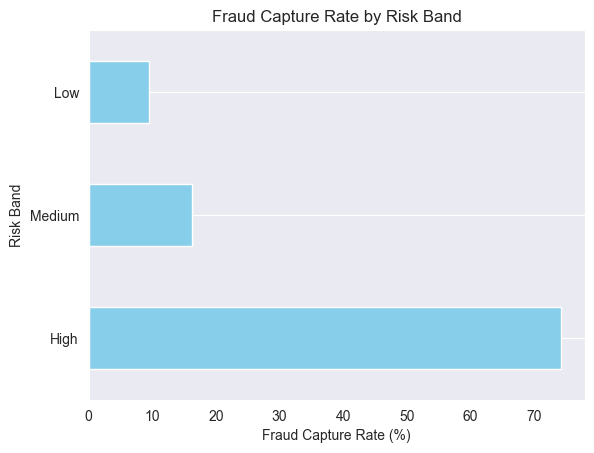

In [60]:
risk_summary['fraud_capture_rate'].plot(kind='barh', color='skyblue')
plt.title('Fraud Capture Rate by Risk Band')
plt.xlabel('Fraud Capture Rate (%)')
plt.ylabel('Risk Band')
plt.grid(axis='x')
plt.show()